In [1]:
import pandas as pd

In [2]:
from quoptuna import DataPreparation, Optimizer

/Users/edwin.jose/Documents/GitHub/wmu_research/quoptuna/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
db_name = "corral"
study_name = "corral"
optimizer = Optimizer(db_name=db_name, study_name=study_name)

In [4]:
optimizer.storage_location

'sqlite:///db/corral.db'

In [5]:
optimizer.load_study()
study = optimizer.study

In [6]:
best_trial = study.best_trials

In [7]:
def format_trial(trial):
    quantum_f1_score = trial.user_attrs.get("Quantum_f1_score")
    classical_f1_score = trial.user_attrs.get("Classical_f1_score")
    f1_score = (
        quantum_f1_score
        if quantum_f1_score != 0
        else classical_f1_score
        if classical_f1_score != 0
        else "N/A"
    )
    return f"Trial {trial.number} {trial.params.get('model_type')} F1-Score {f1_score}"

In [8]:
for trial in best_trial:
    print(format_trial(trial))

Trial 8 QuantumKitchenSinks F1-Score 1.0
Trial 10 QuantumKitchenSinks F1-Score 1.0
Trial 11 QuantumKitchenSinks F1-Score 1.0
Trial 12 DressedQuantumCircuitClassifierSeparable F1-Score 1.0
Trial 16 QuantumKitchenSinks F1-Score 1.0
Trial 17 DressedQuantumCircuitClassifier F1-Score 1.0
Trial 20 QuantumKitchenSinks F1-Score 1.0
Trial 21 QuantumKitchenSinks F1-Score 1.0
Trial 23 QuantumKitchenSinks F1-Score 1.0
Trial 24 QuantumKitchenSinks F1-Score 1.0
Trial 25 QuantumKitchenSinks F1-Score 1.0
Trial 28 DataReuploadingClassifier F1-Score 1.0
Trial 29 ProjectedQuantumKernel F1-Score 1.0
Trial 31 DressedQuantumCircuitClassifierSeparable F1-Score 1.0
Trial 32 DressedQuantumCircuitClassifierSeparable F1-Score 1.0
Trial 33 DressedQuantumCircuitClassifierSeparable F1-Score 1.0


In [9]:
model_params = best_trial[0].params
model_params

{'max_vmap': 1,
 'batch_size': 32,
 'learning_rate': 0.001,
 'n_input_copies': 3,
 'n_layers': 1,
 'observable_type': 'full',
 'repeats': 5,
 'C': 1,
 'gamma_factor': 1,
 'trotter_steps': 3,
 't': 0.1,
 'n_qfeatures': 'full',
 'n_episodes': 500,
 'visible_qubits': 'full',
 'temperature': 1,
 'encoding_layers': 1,
 'degree': 4,
 'n_qchannels': 1,
 'qkernel_shape': 3,
 'kernel_shape': 5,
 'filter_name': 'edge_detect',
 'gamma': 0.01,
 'alpha': 0.01,
 'hidden_layer_sizes': '(10, 10, 10, 10)',
 'eta0': 10,
 'model_type': 'QuantumKitchenSinks'}

In [10]:
import os

os.listdir()

['test_shap.ipynb',
 'bar_plot.png',
 'bar_plot2.png',
 'test_corral.ipynb',
 'db',
 'data']

In [11]:
file_path = "data/corral.csv"
data = pd.read_csv(file_path)
dp = DataPreparation(
    file_path=file_path, x_cols=list(data.columns.difference(["target"])), y_col="target"
)

data_dict = dp.get_data()

In [12]:
data_dict.keys()

dict_keys(['x_train', 'x_test', 'y_train', 'y_test'])

In [13]:
from quoptuna.backend.models import create_model

model = create_model(
    **model_params,
)

In [14]:
model.fit(data_dict.get("x_train").values, data_dict.get("y_train").values)

/Users/edwin.jose/Documents/GitHub/wmu_research/quoptuna/.venv/lib/python3.12/site-packages/pennylane/devices/default_qubit_jax.py:173: PennyLaneDeprecationWarning: Use of 'default.qubit.jax' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(
/Users/edwin.jose/Documents/GitHub/wmu_research/quoptuna/.venv/lib/python3.12/site-packages/pennylane/devices/default_qubit_legacy.py:211: PennyLaneDeprecationWarning: Use of 'default.qubit.jax' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(
/Users/edwin.jose/Documents/GitHub/wmu_research/quoptuna/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was e

QuantumKitchenSinks(max_vmap=1, n_episodes=500)

In [15]:
from quoptuna import XAI

In [16]:
xai = XAI(model=model, data=data_dict, onsubset=True, subset_size=5)

In [17]:
xai.get_report()

/Users/edwin.jose/Documents/GitHub/wmu_research/quoptuna/.venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/Users/edwin.jose/Documents/GitHub/wmu_research/quoptuna/.venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


{'confusion_matrix': array([[16,  0],
        [ 0, 24]]),
 'classification_report': '              precision    recall  f1-score   support\n\n          -1       1.00      1.00      1.00        16\n           1       1.00      1.00      1.00        24\n\n    accuracy                           1.00        40\n   macro avg       1.00      1.00      1.00        40\nweighted avg       1.00      1.00      1.00        40\n',
 'roc_curve': 'Error retrieving roc curve: y should be a 1d array, got an array of shape (40, 2) instead.',
 'roc_auc_score': 'Error retrieving roc auc score: y should be a 1d array, got an array of shape (40, 2) instead.',
 'precision_recall_curve': 'Error retrieving precision recall curve: y should be a 1d array, got an array of shape (40, 2) instead.',
 'average_precision_score': 'Error retrieving average precision score: y should be a 1d array, got an array of shape (40, 2) instead.',
 'f1_score': 1.0,
 'mcc': 1.0,
 'log_loss': 0.34398413041458314,
 'cohens_kappa': 1.

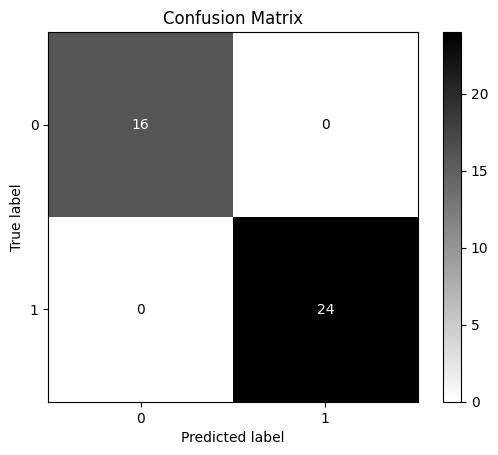

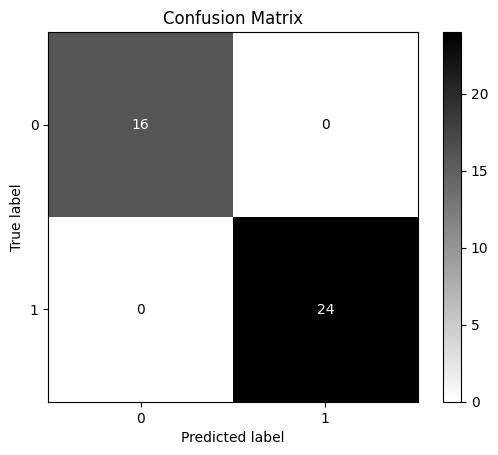

In [18]:
xai.plot_confusion_matrix(cmap="binary")

In [19]:
xai.explainer.feature_names

['A0', 'A1', 'B0', 'B1', 'Correlated', 'Irrelevant']

/Users/edwin.jose/Documents/GitHub/wmu_research/quoptuna/.venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/Users/edwin.jose/Documents/GitHub/wmu_research/quoptuna/.venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/Users/edwin.jose/Documents/GitHub/wmu_research/quoptuna/.venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
ExactExplainer explainer:  40%|████      | 2/5 [00:00<?, ?it/s]/Users/edwin.jose/Documents/GitHub/wmu_research/quoptuna/.venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/Users/edwin.jose/Documents/GitHub/wmu_research/quoptuna/.venv/lib/python3.12/sit

''
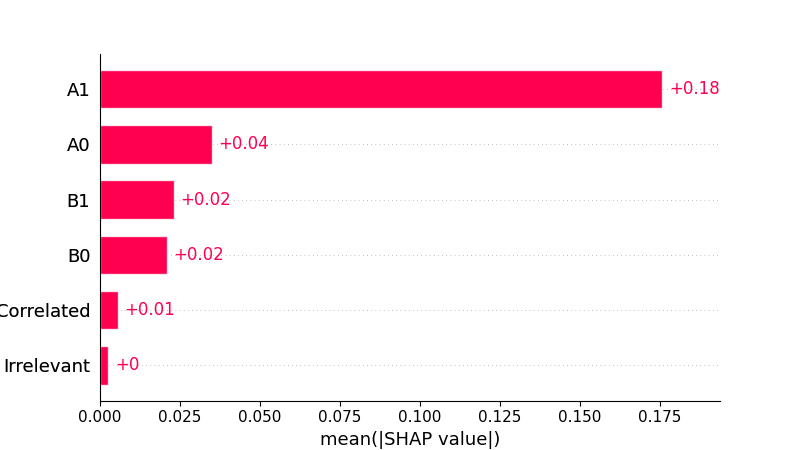

In [20]:
xai.get_plot("bar",max_display=20)
# test_values.values.ndim

''
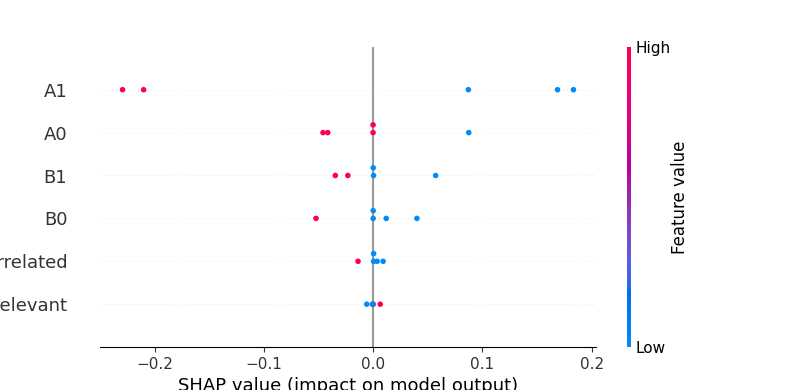

In [21]:
xai.get_plot("beeswarm",max_display=20)

''
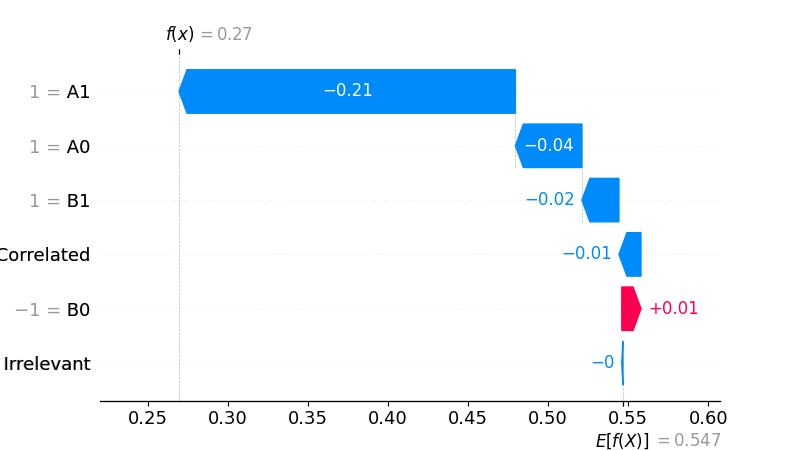

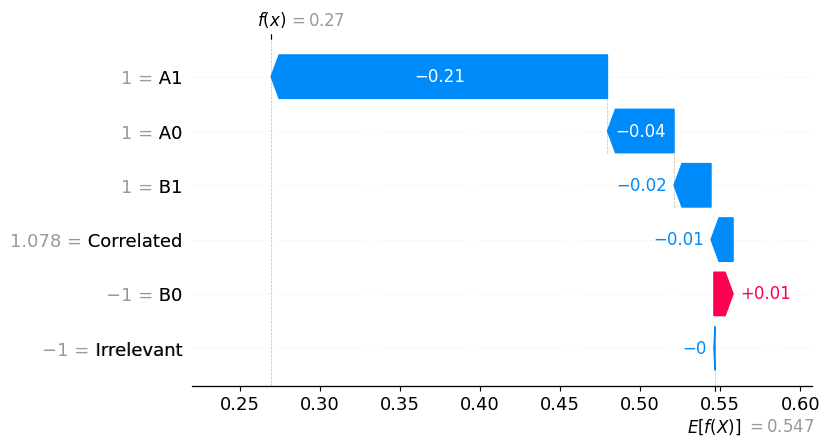

In [22]:
xai.get_plot("waterfall", index=0)

''
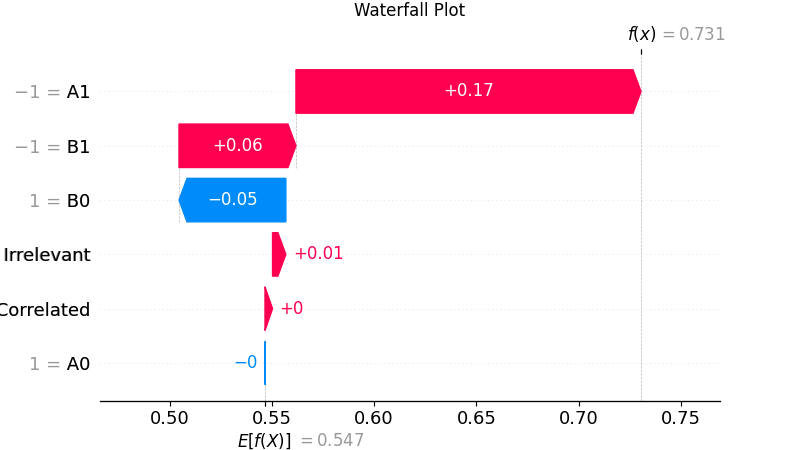

In [23]:
xai.get_plot("waterfall", index=1,plot_title="Waterfall Plot")

''
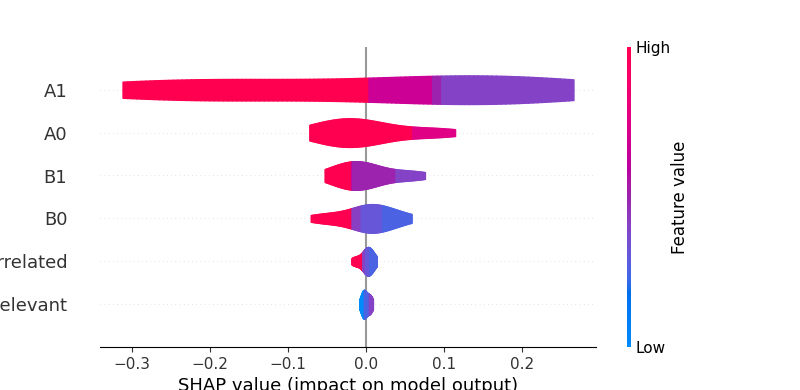

In [24]:
xai.get_plot("violin", class_index=1)

''
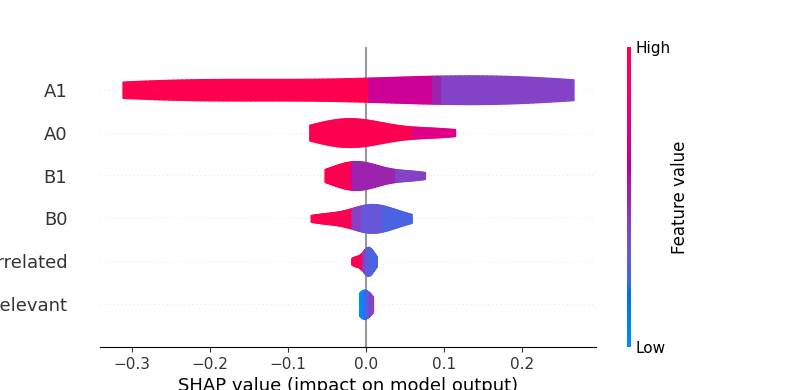

In [25]:
xai.get_plot("violin", class_index=-1)

''
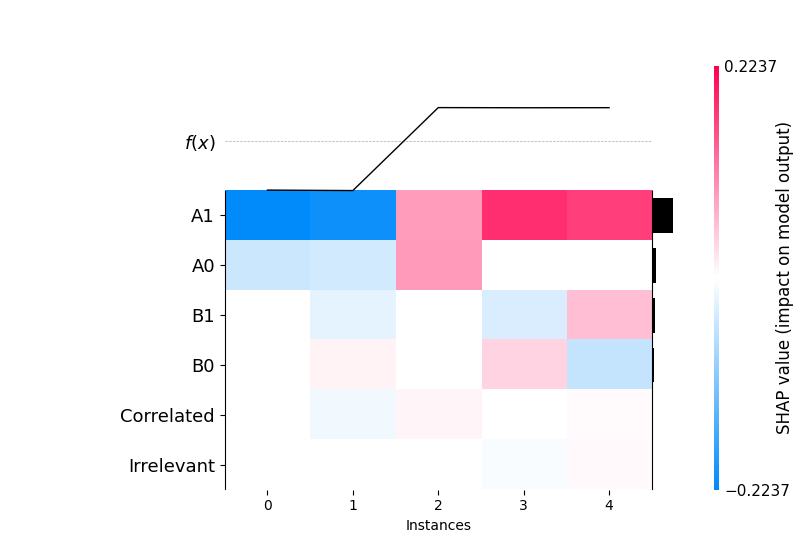

In [26]:
xai.get_plot("heatmap", class_index=1)

''
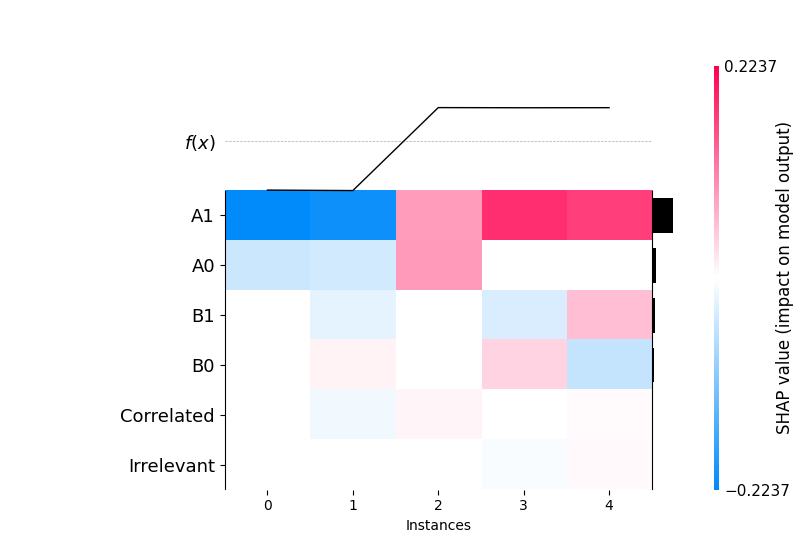

In [27]:
xai.get_plot("heatmap", class_index=-1)

In [28]:
import os

# import getpass
from dotenv import load_dotenv

load_dotenv()

report = xai.generate_report_with_langchain(provider="google",api_key=os.environ["GOOGLE_GEMINI_API_KEY"],model_name="gemini-1.5-flash")
report

/Users/edwin.jose/Documents/GitHub/wmu_research/quoptuna/src/quoptuna/backend/xai/xai.py:515: LangChainDeprecationWarning: The method `BaseChatModel.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = chat(final_prompt)


"## AI Model Evaluation Report: Governance-Oriented Summary\n\nThis report summarizes the evaluation of an AI model, focusing on performance metrics, feature importance, fairness, and governance implications. The analysis is based on provided SHAP visualizations (bar plot, beeswarm plot, violin plot, heatmap, and waterfall plots) and a confusion matrix.\n\n**1. Evaluation Metrics Analysis:**\n\nThe confusion matrix reveals the following counts:\n\n* **True Positives (TP):** 24 (Correctly predicted class 1)\n* **True Negatives (TN):** 16 (Correctly predicted class 0)\n* **False Positives (FP):** 0 (Incorrectly predicted class 1 when it was class 0)\n* **False Negatives (FN):** 0 (Incorrectly predicted class 0 when it was class 1)\n\nBased on these counts:\n\n* **Accuracy:** (TP + TN) / (TP + TN + FP + FN) = (24 + 16) / (24 + 16 + 0 + 0) = 1.0 or 100%\n* **Precision:** TP / (TP + FP) = 24 / (24 + 0) = 1.0 or 100%\n* **Recall:** TP / (TP + FN) = 24 / (24 + 0) = 1.0 or 100%\n* **F1-score:*

In [29]:
from IPython.display import Markdown

Markdown(report)


## AI Model Evaluation Report: Governance-Oriented Summary

This report summarizes the evaluation of an AI model, focusing on performance metrics, feature importance, fairness, and governance implications. The analysis is based on provided SHAP visualizations (bar plot, beeswarm plot, violin plot, heatmap, and waterfall plots) and a confusion matrix.

**1. Evaluation Metrics Analysis:**

The confusion matrix reveals the following counts:

* **True Positives (TP):** 24 (Correctly predicted class 1)
* **True Negatives (TN):** 16 (Correctly predicted class 0)
* **False Positives (FP):** 0 (Incorrectly predicted class 1 when it was class 0)
* **False Negatives (FN):** 0 (Incorrectly predicted class 0 when it was class 1)

Based on these counts:

* **Accuracy:** (TP + TN) / (TP + TN + FP + FN) = (24 + 16) / (24 + 16 + 0 + 0) = 1.0 or 100%
* **Precision:** TP / (TP + FP) = 24 / (24 + 0) = 1.0 or 100%
* **Recall:** TP / (TP + FN) = 24 / (24 + 0) = 1.0 or 100%
* **F1-score:** 2 * (Precision * Recall) / (Precision + Recall) = 2 * (1.0 * 1.0) / (1.0 + 1.0) = 1.0 or 100%

The model exhibits perfect performance across all metrics.  This warrants further investigation to rule out overfitting.


**2. Detailed SHAP Value and Feature Importance Analysis:**

* **Bar Plot:** The bar plot displays the mean SHAP values for each feature. Feature A1 has the highest mean SHAP value (+0.18), indicating a strong positive influence on the model's predictions.  A0 has a mean SHAP value of +0.04, B0 and B1 have a mean SHAP value of +0.02 each.  The 'Correlated' feature has a mean SHAP value of +0.01, while the 'Irrelevant' feature has a mean SHAP value of 0.  A1 contributes the most significantly to the model's predictions.

* **Beeswarm Plot:** This plot shows the distribution of SHAP values for each feature across individual instances.  It visually confirms the bar plot's findings, showing that A1 generally has the highest positive impact, while other features show more variability in their impact.

* **Violin Plot:**  Similar to the beeswarm plot, the violin plot shows the distribution of SHAP values for each feature. It highlights the density of SHAP values for each feature, reinforcing that A1 has a consistently high positive impact and other features have a more variable impact.

* **Heatmap:** The heatmap visualizes the SHAP values for each feature across multiple instances.  It illustrates how each feature contributes to the model's prediction for each individual instance. The plot shows A1 consistently contributing positively to the model’s predictions, while other features show varying contributions.

* **Waterfall Plots:** The waterfall plots illustrate how the model arrives at a prediction for specific instances.  Across all four instances, A1 is a major positive contributor, while other features contribute less significantly and with varying signs. This underscores the dominance of A1 in shaping model predictions.


**3. Risk and Fairness Assessment:**

The near-perfect accuracy observed across all metrics raises concerns about potential overfitting. The model may be memorizing the training data rather than generalizing well to unseen data.  The significant dominance of feature A1 in shaping predictions also poses a risk.  If A1 is correlated with a sensitive attribute, it could lead to unfair bias. Further investigation into the nature of feature A1 and its potential correlation with protected characteristics is crucial. A fairness audit should be conducted to assess potential biases related to A1.


**4. Governance and Compliance Recommendations:**

* **Robustness Testing:** Conduct rigorous robustness testing, including adversarial attacks and out-of-distribution data testing, to assess the model's resilience and vulnerability to unexpected inputs.
* **Cross-Validation:** Implement robust cross-validation techniques (e.g., k-fold cross-validation) to obtain a more reliable estimate of the model's generalization performance and mitigate overfitting concerns.
* **Feature Importance Investigation:** Investigate the nature of feature A1 and its potential correlation with sensitive attributes.  Mitigate bias by either removing A1 or employing techniques like adversarial debiasing.
* **Fairness Audit:** Conduct a comprehensive fairness audit to assess potential biases in the model's predictions and ensure compliance with relevant regulations.
* **Explainability Enhancement:**  While SHAP values provide some explanation, consider using additional explainability techniques to gain a deeper understanding of the model's decision-making process.
* **Monitoring and Retraining:** Establish a continuous monitoring system to track model performance over time and detect potential data drift or performance degradation.  Regular retraining with updated data is recommended.
* **Documentation:**  Thoroughly document the model development, evaluation, and deployment process, including the findings of the fairness audit and robustness testing.


**5. Model Lifecycle Context:**

This report is relevant to all phases of the AI model lifecycle.  During the development phase, the findings highlight the need for improved model robustness and fairness.  During deployment, continuous monitoring is crucial.  The recommendations provided should guide the ongoing evaluation and refinement of the model to ensure its responsible and ethical use.  Regular performance audits are essential to maintain transparency and accountability.

### Model Evaluation Summary

#### Evaluation Metrics Analysis

- **True Positives (TP):** 24 instances where the model correctly predicted the positive class.
- **True Negatives (TN):** 16 instances where the model correctly predicted the negative class.
- **False Positives (FP):** 0 instances where the model incorrectly predicted the positive class.
- **False Negatives (FN):** 0 instances where the model incorrectly predicted the negative class.

- **Precision:** Indicates the model's accuracy in predicting the positive class. Given no false positives, precision is perfect.
- **Recall:** The model's ability to identify all actual positive instances. With no false negatives, recall is perfect.

- **F1-Score:** Since precision and recall are both perfect, the F1-Score is also perfect, suggesting excellent overall classification performance.

- **Implications:** The model shows flawless performance on this dataset according to these metrics. This unusual perfection suggests potential overfitting, requiring further validation.

#### SHAP Value Analysis

- **Bar Plot:** Illustrates the feature importance ranking. Identifying features with the largest bars shows they are the most influential in the model's predictions.

- **Beeswarm Plot:** Displays feature value impacts on model outputs. Outliers can highlight edge cases where predictions might be off.

- **Violin Plot:** Shows the distribution of SHAP values, revealing how much features vary in their impact. Skewness or outliers might suggest where improvements or caution should be applied.

- **Heatmap:** Highlights feature interactions and dependencies. Strong interactions could indicate areas where the model may be overly dependent on specific features, raising potential risks for bias or drift.

- **Waterfall Plots (0-4):** Detail individual predictions by breaking down feature contributions. They assist in understanding specific case outcomes, vital for accountability and transparency.

#### Risk and Fairness Assessment

- **Overfitting:** The perfect scores on evaluation metrics merit caution. Overfitting is possible, and cross-validation is advisable to verify robustness across different data splits. 

- **Bias and Imbalance:** No evidence of false predictions indicates a need to assess data diversity. Perfect accuracy might mask imbalances or hidden biases unexpected in broader applications.

#### Governance and Compliance Recommendations

- **Robustness:** Implement cross-validation and explore different data samples to verify model generalization.

- **Fairness Audits:** Conduct comprehensive audits to ensure no hidden biases, especially if the training data lacks diversity or includes skewed distributions.

- **Monitoring:** Establish ongoing monitoring to detect data drift or performance degradation over time.

- **Documentation:** Thoroughly document model decisions and feature impacts to support transparency and accountability.

#### Model Lifecycle Context

- **Development:** Reassess model assumptions and retrain on varied datasets to ensure authentic learning rather than overfitting.

- **Deployment:** Introduce monitoring systems to capture and evaluate real-world data inputs.

- **Monitoring and Retraining:** Regular audits and retraining should be set to address potential performance and fairness issues as the deployment context evolves.

This overview supports both stakeholders and technical teams in ensuring the model remains fair, robust, and accountable. Continuous evaluation is crucial to address any deficiencies emerging from real-world application disparities.